<a href="https://colab.research.google.com/github/Amarsinh0/MY-NOTES/blob/main/Copy_of_MY_notes_k_m_ML_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd 
import numpy as np
df=pd.read_csv("/content/insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **corrcoef**

In [7]:
height=[160,162,165,168,170,174]
weight=[60,61,64,75,65,67]
print(np.corrcoef(height,weight))

[[1.         0.58433458]
 [0.58433458 1.        ]]


In [8]:
print(np.corrcoef(height,weight)[0][1])

0.5843345794213614


In [9]:
df=pd.read_csv("/content/insurance.csv")

In [10]:
df.charges.corr(df.bmi)

0.19834096883362895

### **find value of person correlation (r) and probability value (p)**

---
**person corelation(r)**..1) how much two numric variables influence each other
2)range from -1 to 1




In [11]:
from scipy import stats

In [12]:
r,p=stats.pearsonr(df.charges,df.age)

In [13]:
print(r)

0.2990081933306476


In [14]:
print(p)

4.8866933317203816e-29


In [15]:
import pandas as pd 
import numpy as np
df=pd.read_csv("/content/insurance.csv")
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [16]:
corr_df=pd.DataFrame(columns=['r','p'])
for col in df:
  print(col)

age
sex
bmi
children
smoker
region
charges


In [ ]:
corr_df=pd.DataFrame(columns=['r','p'])
for col in df:
  print(col)
  if pd.api.types.is_numeric_dtype(df[col])and col!='charges':
    r,p=stats.pearsonr(df.charges,df[col])
    corr_df.loc[col]=[round(r,3),round(p,3)]
corr_df

In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
import matplotlib.pyplot as plt


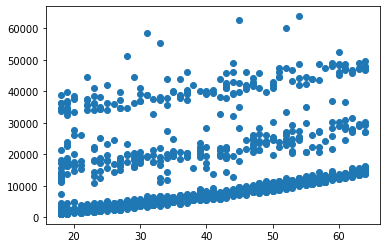

In [20]:
plt.scatter(df.age,df.charges)
plt.show()

In [21]:
df_smoker=df[df['smoker']=='yes']
df_nonsmoker=df[df['smoker']=='no']
df_smoker

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


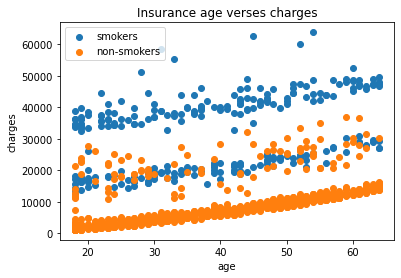

In [22]:
df_smoker=df[df['smoker']=='yes']  # save in  separate variabels:   'yes' as df_smoker and 'no' as df_nonsmoker
df_nonsmoker=df[df['smoker']=='no']

plt. scatter (df_smoker.age,df_smoker.charges,label='smokers')           #scatter plot of age vs charges of ..smoker
plt. scatter (df_nonsmoker.age,df_nonsmoker.charges,label='non-smokers') #scatter plot of age vs charges of.. nonsmoker

plt.title('Insurance age verses charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.show()

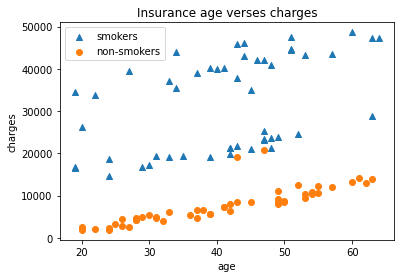

In [23]:
df_smoker_reduced=df_smoker.sample(50)    #  reduced sample size  to 50 for clear ploting
df_nonsmoker_reduced=df_nonsmoker.sample(50)

plt. scatter (df_smoker_reduced.age,df_smoker_reduced.charges,label='smokers',marker='^')  # only use '_reduced' as extra word before variables
plt. scatter (df_nonsmoker_reduced.age,df_nonsmoker_reduced.charges,label='non-smokers',marker='o')

plt.title('Insurance age verses charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.show()

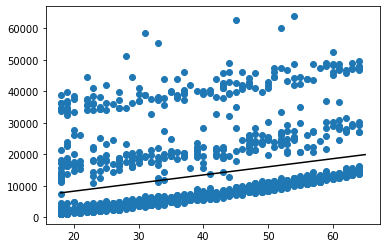

In [24]:
#y=mx+c
#y=slope(x)+intercept
m,c,r,p,err= stats.linregress(df.age,df.charges)
x=range(18,df.age.max()+2)
y=m*x+c
plt.plot(x,y,color='black')
plt.scatter(df.age,df.charges)
plt.show()

In [27]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model=ols(formula='charges~age',data=df).fit()

white_test=het_white(model.resid,model.model.exog)
breuschpagan_test=het_breuschpagan(model.resid,model.model.exog)

output_df=pd.DataFrame(columns=['LM stat','LM p','F stat','f stats p'])
output_df.loc['white']=white_test
output_df.loc['breush-pagan']=breuschpagan_test

output_df

,LM stat,LM p,F stat,f stats p
white,0.002713,0.998645,0.001353,0.998648
breush-pagan,0.000413,0.983776,0.000413,0.983792


## **breuschpagan_test:---**

* link:--https://www.statology.org/breusch-pagan-test/



### **WHITE_TEST:**

LINK:https://www.statology.org/white-test-in-python/



### **what is LM stats:-**The Lagrange multiplier (LM) test statistic is the product of the R2 value and sample size: This follows a chi-squared distribution, with degrees of freedom equal to P − 1, where P is the number of estimated parameters (in the auxiliary regression). 

### **what is LM P**: In statistics, a linear probability model (LPM) is a special case of a binary regression model. Here the dependent variable for each observation takes values which are either 0 or 1. The probability of observing a 0 or 1 in any one case is treated as depending on one or more explanatory variables. For the "linear probability model", this relationship is a particularly simple one, and allows the model to be fitted by linear regression.


## *  F-statistic. 

**Purpose**
In linear regression, the F-statistic is the test statistic for the analysis of variance (ANOVA) approach to test the significance of the model or the components in the model.

**Definition**
The F-statistic in the linear model output display is the statistic for testing the statistical significance of the model. The model property ModelFitVsNullModel contains the same statistic.

The F-statistic values in the anova display allow you to assess the significance of the terms or components in the model.

-----------------------------------------------
### *T statastics : https://www.statology.org/t-test-linear-regression/ 




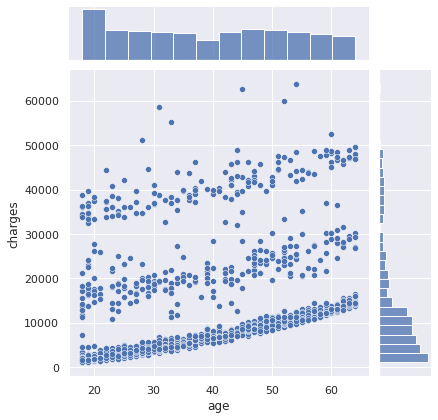

In [34]:
import seaborn as sns 
sns.set(color_codes=True)
sns.jointplot(x='age',y='charges',data=df)
plt.show()

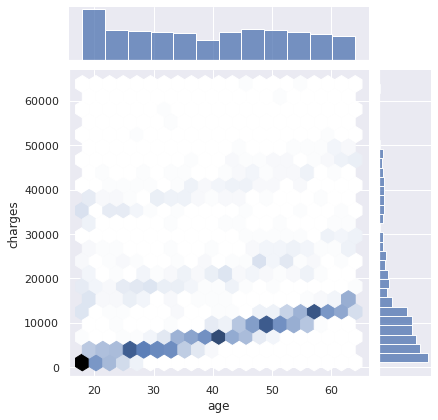

In [36]:
sns.jointplot(x='age',y='charges',data=df,kind='hex');

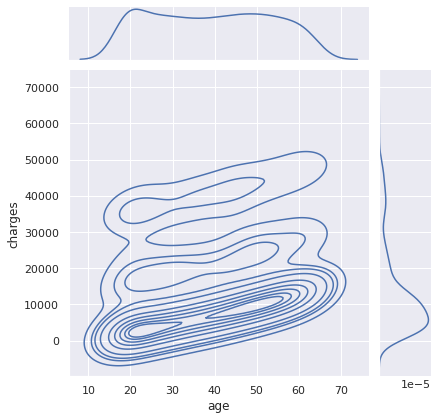

In [45]:
sns.jointplot(x='age',y='charges',data=df, kind='kde');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


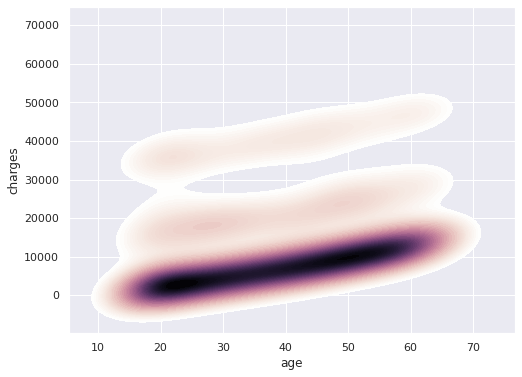

In [57]:
f,ax=plt.subplots(figsize=(8,6))
cmap=sns.cubehelix_palette(as_cmap=True,dark=0,light=1,reverse=False)
sns.kdeplot(df.age,df.charges,cmap=cmap,n_levels=60,shade=True);

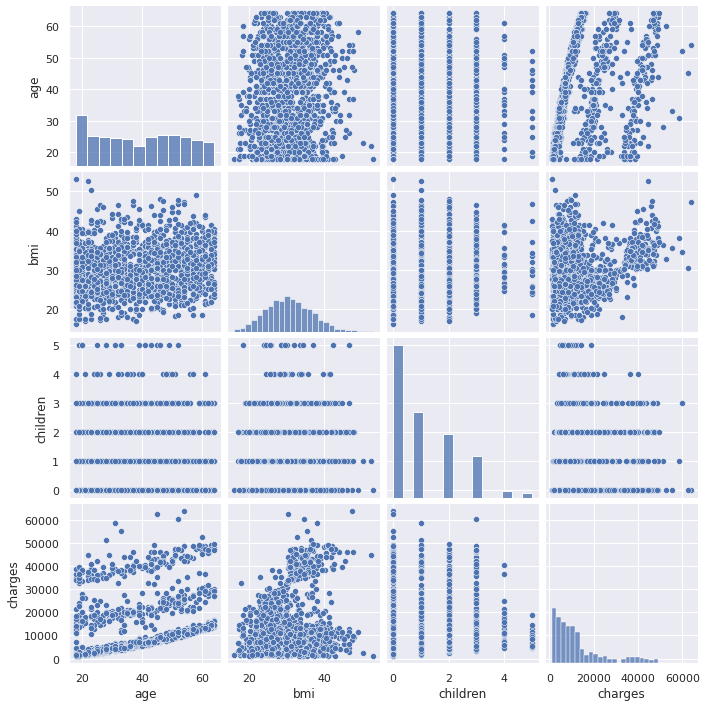

In [58]:
df.dropna(inplace=True) # remove null values first
sns.pairplot(df);

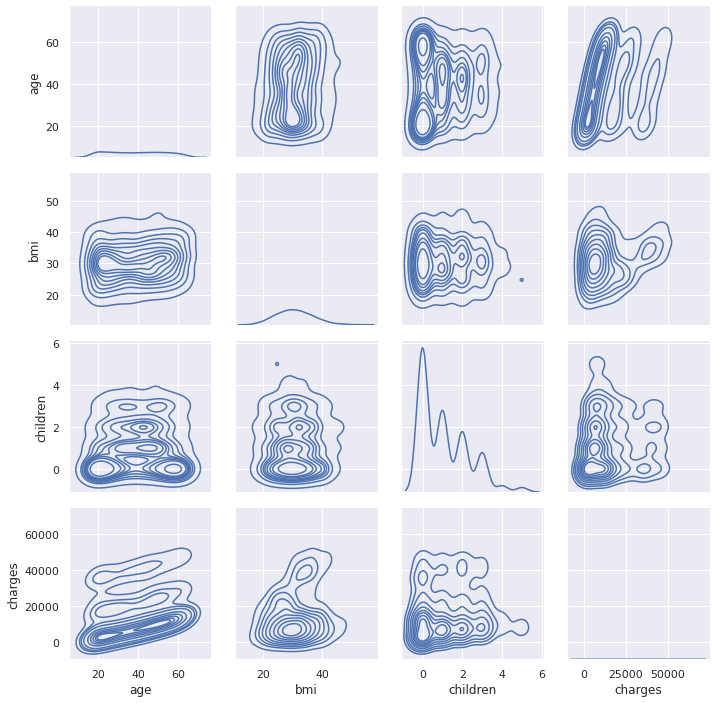

In [60]:
g=sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,n_levels=10);

In [64]:
import pandas as pd
import plotly.express as px
fig=px.scatter_3d(df,x='age',y='charges',z='bmi',color='smoker',symbol='sex',size='children')
fig.show()